In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
d = {
    "angle": list(np.arange(0, 105, 15)),
    "intensity": [
        6709,
        6151,
        4924,
        3348,
        1714,
        468.2,
        2.2
    ],
    "intensity_error": [
        0.77,
        0.99,
        1.48,
        .27,
        0.66,
        .051,
        .1
    ]
}

d

{'angle': [0, 15, 30, 45, 60, 75, 90],
 'intensity': [6709, 6151, 4924, 3348, 1714, 468.2, 2.2],
 'intensity_error': [0.77, 0.99, 1.48, 0.27, 0.66, 0.051, 0.1]}

In [27]:
df = pd.DataFrame(d)
df

,angle,intensity,intensity_error
0,0,6709.0,0.770
1,15,6151.0,0.990
2,30,4924.0,1.480
3,45,3348.0,0.270
4,60,1714.0,0.660
5,75,468.2,0.051
6,90,2.2,0.100


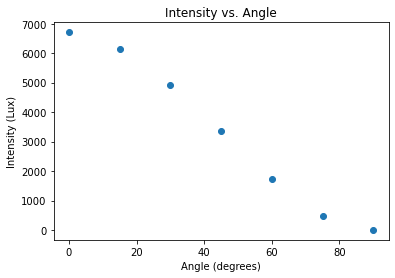

In [29]:
# plt.plot_err(d["angle"], d["intensity"])
plt.errorbar(d["angle"], d["intensity"], yerr=d["intensity_error"], fmt='o')
# plt.xlim(0, 90)
plt.title("Intensity vs. Angle")
plt.xlabel("Angle (degrees)")
plt.ylabel("Intensity (Lux)");

In [59]:
# 1.4
def intensity_func(theta, I_bg, I_0, theta_0):
    return I_bg + I_0 * np.cos((theta - theta_0) * np.pi / 180)**2

In [60]:
from scipy.optimize import curve_fit

In [61]:
parameters, covariance = curve_fit(intensity_func, df["angle"], df["intensity"])


In [62]:
parameters

array([  35.63250724, 6616.80766578, 4499.78687702])

In [70]:
180 - parameters[2] % 180

0.21312298267457663

In [63]:
SE = np.sqrt(np.diag(covariance))
SE

array([44.91980626, 55.03035108,  0.47404144])

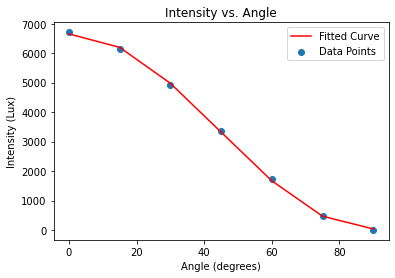

In [64]:
plt.plot(df["angle"], intensity_func(df["angle"], *parameters), 'r-', label="Fitted Curve")
plt.scatter(df["angle"], df["intensity"], label="Data Points")

plt.title("Intensity vs. Angle")
plt.xlabel("Angle (degrees)")
plt.legend()
plt.ylabel("Intensity (Lux)");

In [72]:
from scipy.stats import chisquare

In [74]:
chi_square, p_value = chisquare(df["intensity"], intensity_func(df["angle"], *parameters))

In [76]:
chi_square / len(df["intensity"])

4.904403252693784